In [6]:
import wave, struct, math
import matplotlib.pyplot as plt
import numpy as np  
from scipy import signal

In [45]:
spf = wave.open('../../audio/conversations/2_speaker.ar.wav','r')
#Extract Raw Audio from Wav File
sig = spf.readframes(-1)
sig = np.frombuffer(sig, np.int16)

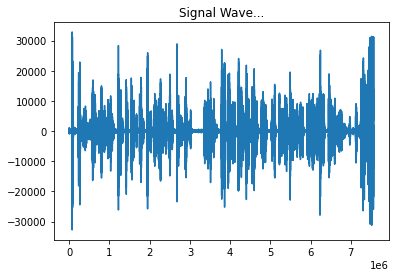

In [46]:
plt.title('Signal Wave...')
plt.plot(sig)

In [19]:
sos1A = signal.butter(10, 600, 'lp', fs=spf.getframerate(), output='sos')
sos2A = signal.butter(10, 50, 'hp', fs=spf.getframerate(), output='sos')
fil1 = signal.sosfilt(sos1A, sig)
filteredA = signal.sosfilt(sos2A, fil1)


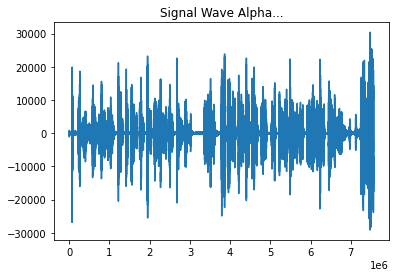

In [39]:
plt.title('Signal Wave Alpha...')
plt.plot(filteredA)

In [25]:
filteredA.max()

30417.41334701311

In [49]:
blockAmplitudeMean = sum(np.absolute(filteredA))/len(filteredA)
blockAmplitudeMean

1300.5360598671073

In [50]:
blockLinearRms= np.sqrt(np.mean(filteredA**2)) # Linear value between 0 -> 1
blockLogRms = 20 * math.log10(blockLinearRms) # Decibel (dB value) between 0 dB -> -inf dB
blockLogRms = round(blockLogRms,2)

In [52]:
print(f"{blockLogRms} dB")

67.64 dB


In [ ]:
def avg_sound(filepath):
  spf = wave.open(filepath,'r')
  sig = spf.readframes(-1)
  sig = np.frombuffer(sig, np.int16)
  sos1A = signal.butter(10, 600, 'lp', fs=spf.getframerate(), output='sos')
  sos2A = signal.butter(10, 50, 'hp', fs=spf.getframerate(), output='sos')
  fil1 = signal.sosfilt(sos1A, sig)
  filteredA = signal.sosfilt(sos2A, fil1)
  filteredA.max()
  blockAmplitudeMean = sum(np.absolute(filteredA))/len(filteredA)
  blockAmplitudeMean
  blockLinearRms= np.sqrt(np.mean(filteredA**2)) # Linear value between 0 -> 1
  blockLogRms = 20 * math.log10(blockLinearRms) # Decibel (dB value) between 0 dB -> -inf dB
  blockLogRms = round(blockLogRms,2)
  return blockLogRms